# Advanced topic: Ice albedo feedback in the EBM

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook) by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

*These notes and the companion [Advanced topic: Snowball Earth and Large Ice Cap Instability in the EBM](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/advanced-snowball-earth.html) extend the material in the [Ice-albedo feedback and Snowball Earth in the EBM](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/albedo-snowball.html) notes.*

____________
<a id='section1'></a>

## 1. Interactive snow and ice line in the EBM
____________


### The annual mean EBM

The equation is

\begin{align*}
C(\phi) \frac{\partial T_s}{\partial t} = & ~(1-\alpha) ~ Q - \left( A + B~T_s \right) +  \\
& \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(\cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right)
\end{align*}




### Temperature-dependent ice line parameterization

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f \\
a_i & ~ & T(\phi) \le T_f \\
\end{array} \right. $$


### Adding the interactive ice line to the EBM in climlab

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab

In [2]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='Annual EBM with ice line', 
                            num_lat=180, D=0.55, **param )
print( model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



Because we provided a parameter `ai` for the icy albedo, our model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$.

In [3]:
print(model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [4]:
def ebm_plot( model, figsize=(8,12), show=True ):
    '''This function makes a plot of the current state of the model,
    including temperature, energy budget, and heat transport.'''
    templimits = -30,35
    radlimits = -340, 340
    htlimits = -7,7
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)
    
    fig = plt.figure(figsize=figsize)
    
    ax1 = fig.add_subplot(3,1,1)
    ax1.plot(model.lat, model.Ts)
    ax1.set_xlim(latlimits)
    ax1.set_ylim(templimits)
    ax1.set_ylabel('Temperature (deg C)')
    ax1.set_xticks( lat_ticks )
    ax1.grid()
    
    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(model.lat, model.ASR, 'k--', label='SW' )
    ax2.plot(model.lat, -model.OLR, 'r--', label='LW' )
    ax2.plot(model.lat, model.net_radiation, 'c-', label='net rad' )
    ax2.plot(model.lat, model.heat_transport_convergence, 'g--', label='dyn' )
    ax2.plot(model.lat, model.net_radiation
                        + model.heat_transport_convergence, 'b-', label='total' )
    ax2.set_xlim(latlimits)
    ax2.set_ylim(radlimits)
    ax2.set_ylabel('Energy budget (W m$^{-2}$)')
    ax2.set_xticks( lat_ticks )
    ax2.grid()
    ax2.legend()
    
    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(model.lat_bounds, model.heat_transport)
    ax3.set_xlim(latlimits)
    ax3.set_ylim(htlimits)
    ax3.set_ylabel('Heat transport (PW)')
    ax3.set_xlabel('Latitude')
    ax3.set_xticks( lat_ticks )
    ax3.grid()

    return fig

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.


Total elapsed time is 5.000000000000044 years.


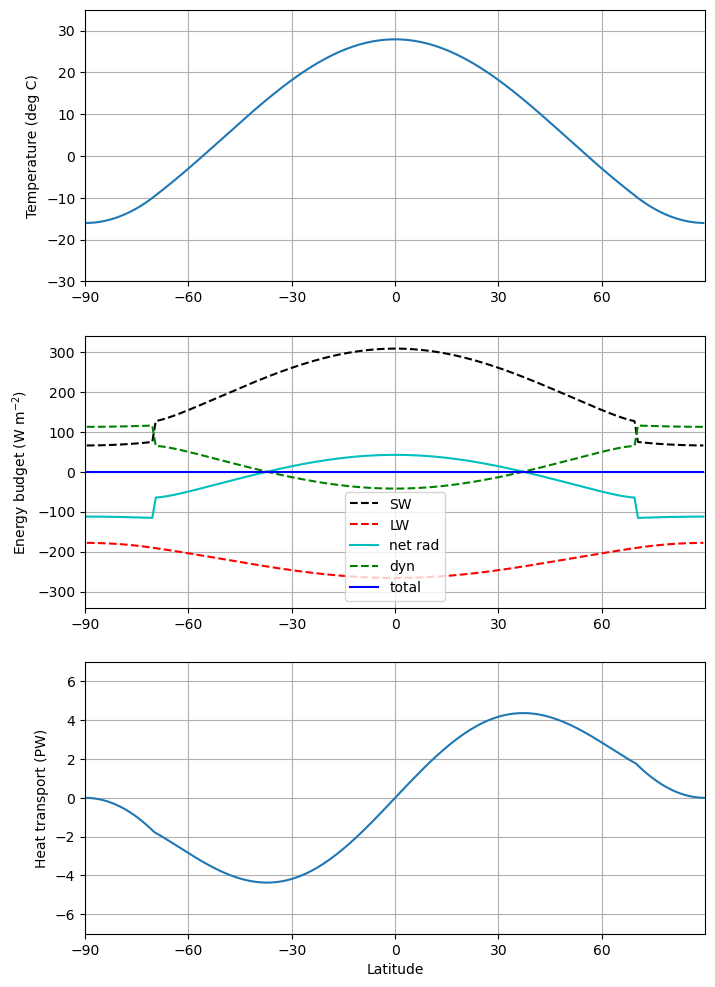

In [5]:
model1.integrate_years(5)
f = ebm_plot(model1)

In [6]:
model1.icelat

array([-70.,  70.])

____________
<a id='section2'></a>

## 2. Polar-amplified warming in the EBM
____________



### Add a small radiative forcing

The equivalent of doubling CO2 in this model is something like 

$$ A \rightarrow A - \delta A $$

where $\delta A = 4$ W m$^{-2}$.


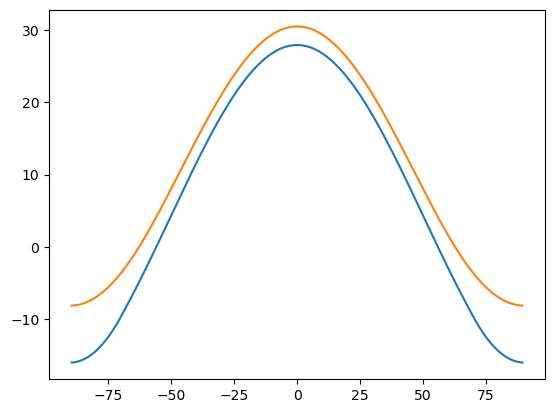

In [7]:
deltaA = 4.

model2 = climlab.process_like(model1)
model2.subprocess['LW'].A = param['A'] - deltaA
model2.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts)
plt.plot(model2.lat, model2.Ts)

The warming is polar-amplified:  more warming at the poles than elsewhere.

Why?

Also, the current ice line is now:

In [8]:
model2.icelat

array([-90.,  90.])

There is no ice left!

### Effects of further radiative forcing in the ice-free regime

Let's do some more greenhouse warming:

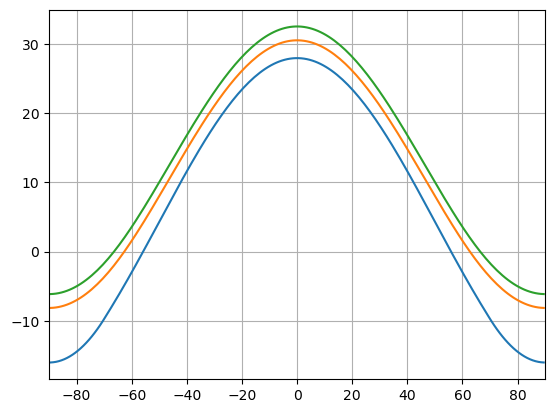

In [9]:
model3 = climlab.process_like(model1)
model3.subprocess['LW'].A = param['A'] - 2*deltaA
model3.integrate_years(5, verbose=False)

plt.plot(model1.lat, model1.Ts)
plt.plot(model2.lat, model2.Ts)
plt.plot(model3.lat, model3.Ts)
plt.xlim(-90, 90)
plt.grid()

In the ice-free regime, there is no polar-amplified warming. A uniform radiative forcing produces a uniform warming.

____________
<a id='section3'></a>

## 3. Effects of diffusivity in the annual mean EBM with albedo feedback
____________



### In-class investigation: Effects of diffusivity with albedo feedback

We will repeat the diffusivity-tuning exercise from the [notes on the 1D EBM](https://brian-rose.github.io/ClimateLaboratoryBook/courseware/one-dim-ebm.html), but this time with albedo feedback included in our model.

- Solve the annual-mean EBM (integrate out to equilibrium) over a range of different diffusivity parameters.
- Make three plots:
    - Global-mean temperature as a function of $D$
    - Equator-to-pole temperature difference $\Delta T$ as a function of $D$
    - Poleward heat transport across 35 degrees $\mathcal{H}_{max}$ as a function of $D$
- Choose a value of $D$ that gives a reasonable approximation to observations:
    - $\Delta T \approx 45$ ºC

Use these parameter values:

In [10]:
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
print( param)

{'A': 210, 'B': 2, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62, 'Tf': -10.0}


### One possible way to do this:

In [11]:
Darray = np.arange(0., 2.05, 0.05)

In [12]:
model_list = []
Tmean_list = []
deltaT_list = []
Hmax_list = []
for D in Darray:
    ebm = climlab.EBM_annual(num_lat=360, D=D, **param )
    ebm.integrate_years(5., verbose=False)
    Tmean = ebm.global_mean_temperature()
    deltaT = np.max(ebm.Ts) - np.min(ebm.Ts)
    HT = np.squeeze(ebm.heat_transport)
    ind = np.where(ebm.lat_bounds==35.5)[0]
    Hmax = HT[ind]
    model_list.append(ebm)
    Tmean_list.append(Tmean)
    deltaT_list.append(deltaT)
    Hmax_list.append(Hmax)

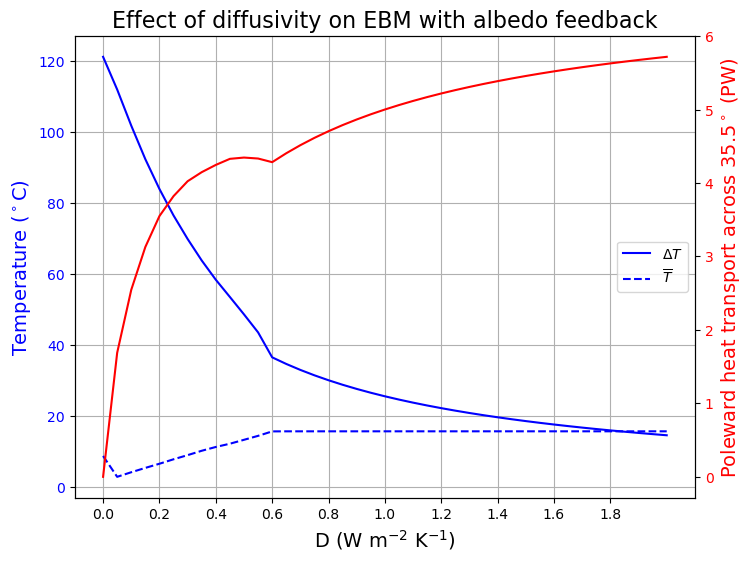

In [13]:
color1 = 'b'
color2 = 'r'

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(Darray, deltaT_list, color=color1, label='$\Delta T$')
ax1.plot(Darray, Tmean_list, '--', color=color1, label='$\overline{T}$')
ax1.set_xlabel('D (W m$^{-2}$ K$^{-1}$)', fontsize=14)
ax1.set_xticks(np.arange(Darray[0], Darray[-1], 0.2))
ax1.set_ylabel('Temperature ($^\circ$C)', fontsize=14,  color=color1)
for tl in ax1.get_yticklabels():
    tl.set_color(color1)
ax1.legend(loc='center right')
ax2 = ax1.twinx()
ax2.plot(Darray, Hmax_list, color=color2)
ax2.set_ylabel('Poleward heat transport across 35.5$^\circ$ (PW)', fontsize=14, color=color2)
for tl in ax2.get_yticklabels():
    tl.set_color(color2)
ax1.set_title('Effect of diffusivity on EBM with albedo feedback', fontsize=16)
ax1.grid()

Discuss!

The heat transport is no longer stricly monotonic in diffusivity $D$. The kink in the graph results from competing effects of increased transport efficiency and decreased temperature gradients due to ice loss.

Realistic present-day conditions seem to occur right near the local maximum of the $\mathcal{H}_{max}$ graph, showing that total heat transport is relatively insensitive to details of the atmosphere-ocean dynamics.

This actually reproduces a result from a classic paper:

[Stone (1978), Constraints on dynamical transports of energy on a spherical planet. *Dyn. Atmos. Oceans* 2, 123--139](https://www.sciencedirect.com/science/article/pii/0377026578900064)

____________

## 4. Diffusive response to a point source of energy
____________

### Step 1: Adding a point heat source to the EBM without albedo feedback

Let's add a point heat source to the EBM and see what sets the spatial structure of the response.

We will add a heat source at about 45º latitude.

First, we will calculate the response in a model **without albedo feedback**.

In [14]:
param_noalb = {'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'a0': 0.3, 'a2': 0.078}
m1 = climlab.EBM_annual(num_lat=180, **param_noalb)
print(m1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



In [15]:
m1.integrate_years(5.)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 5.000000000000044 years.


In [16]:
m2 = climlab.process_like(m1)

In [17]:
point_source = climlab.process.energy_budget.ExternalEnergySource(state=m2.state, timestep=m2.timestep)
ind = np.where(m2.lat == 45.5)
point_source.heating_rate['Ts'][ind] = 100.

m2.add_subprocess('point source', point_source)
print( m2)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>
   point source: <class 'climlab.process.energy_budget.ExternalEnergySource'>



In [18]:
m2.integrate_years(5.)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 9.999999999999863 years.


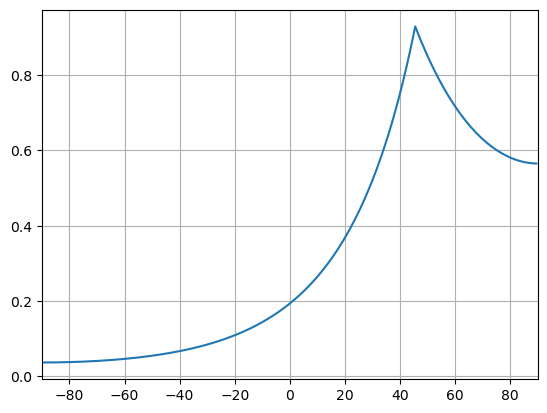

In [19]:
plt.plot(m2.lat, m2.Ts - m1.Ts)
plt.xlim(-90,90)
plt.grid()

The warming effects of our point source are felt **at all latitudes** but the effects decay away from the heat source.

Some analysis will show that the length scale of the warming is proportional to 

$$  \sqrt{\frac{D}{B}} $$

so increases with the diffusivity.

### Step 2: Effects of point heat source with albedo feedback

Now repeat this calculation **with ice albedo feedback**

In [20]:
m3 = climlab.EBM_annual(num_lat=180, **param)
m3.integrate_years(5.)
m4 = climlab.process_like(m3)
point_source = climlab.process.energy_budget.ExternalEnergySource(state=m4.state, timestep=m4.timestep)
point_source.heating_rate['Ts'][ind] = 100.
m4.add_subprocess('point source', point_source)
m4.integrate_years(5.)

Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 5.000000000000044 years.
Integrating for 450 steps, 1826.2110000000002 days, or 5.0 years.


Total elapsed time is 9.999999999999863 years.


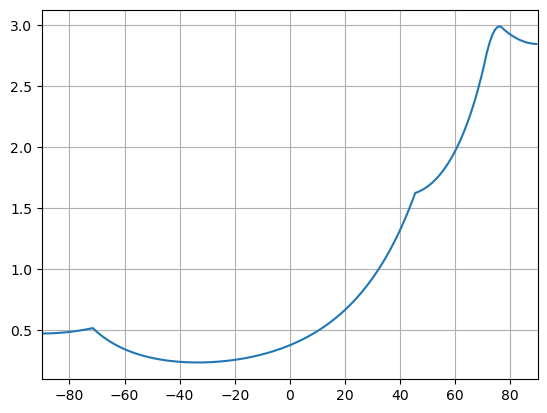

In [21]:
plt.plot(m4.lat, m4.Ts - m3.Ts)
plt.xlim(-90,90)
plt.grid()

Now the maximum warming **does not coincide with the heat source at 45º**!

Our heat source has led to melting of snow and ice, which induces an additional heat source in the high northern latitudes.

**Heat transport communicates the external warming to the ice cap, and also commuicates the increased shortwave absorption due to ice melt globally!**

____________

## Credits

This notebook is part of [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook), an open-source textbook developed and maintained by [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It is licensed for free and open consumption under the
[Creative Commons Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

Development of these notes and the [climlab software](https://github.com/brian-rose/climlab) is partially supported by the National Science Foundation under award AGS-1455071 to Brian Rose. Any opinions, findings, conclusions or recommendations expressed here are mine and do not necessarily reflect the views of the National Science Foundation.
____________